In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [3]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-12_BROCA.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss
40,/volatile2/jc225751/Runs/61_classifier_regress...,0.463065,0.411129,0.503896,0.530257,0.626514,0.577778,0.280060,0.953689,0.000314,138.647964
39,/volatile2/jc225751/Runs/61_classifier_regress...,0.589682,0.530933,0.471284,0.543680,0.617021,0.564791,0.199744,0.828916,0.000905,138.473129
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.514715,0.618167,0.559019,0.092441,0.943518,0.006319,138.720230
8,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.556195,0.629624,0.549928,0.185056,0.824909,0.006050,138.644501
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.569663,0.583797,0.528427,0.561416,0.590507,0.542569,0.126854,0.952424,0.004243,138.822739


In [4]:
len(bdd)

45

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
40,/volatile2/jc225751/Runs/61_classifier_regress...,0.463065,0.411129,0.503896,0.530257,0.626514,0.577778,0.280060,0.953689,0.000314,138.647964,0.843229,1.229677,0.386448,-2.340735,-2.781657,-4.951394,-3.924959
39,/volatile2/jc225751/Runs/61_classifier_regress...,0.589682,0.530933,0.471284,0.543680,0.617021,0.564791,0.199744,0.828916,0.000905,138.473129,0.839298,0.996883,0.157585,-2.612637,-2.677292,-5.101809,-5.064103
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.514715,0.618167,0.559019,0.092441,0.943518,0.006319,138.720230,0.867118,1.000000,0.132882,-2.268652,-4.605170,-4.771726,-3.344308
8,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.556195,0.629624,0.549928,0.185056,0.824909,0.006050,138.644501,0.814182,1.000000,0.185818,-2.611441,-4.605170,-5.265337,-5.084032
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.569663,0.583797,0.528427,0.561416,0.590507,0.542569,0.126854,0.952424,0.004243,138.822739,0.848077,0.846540,0.001538,-3.537297,-3.724145,-5.749195,-4.472783


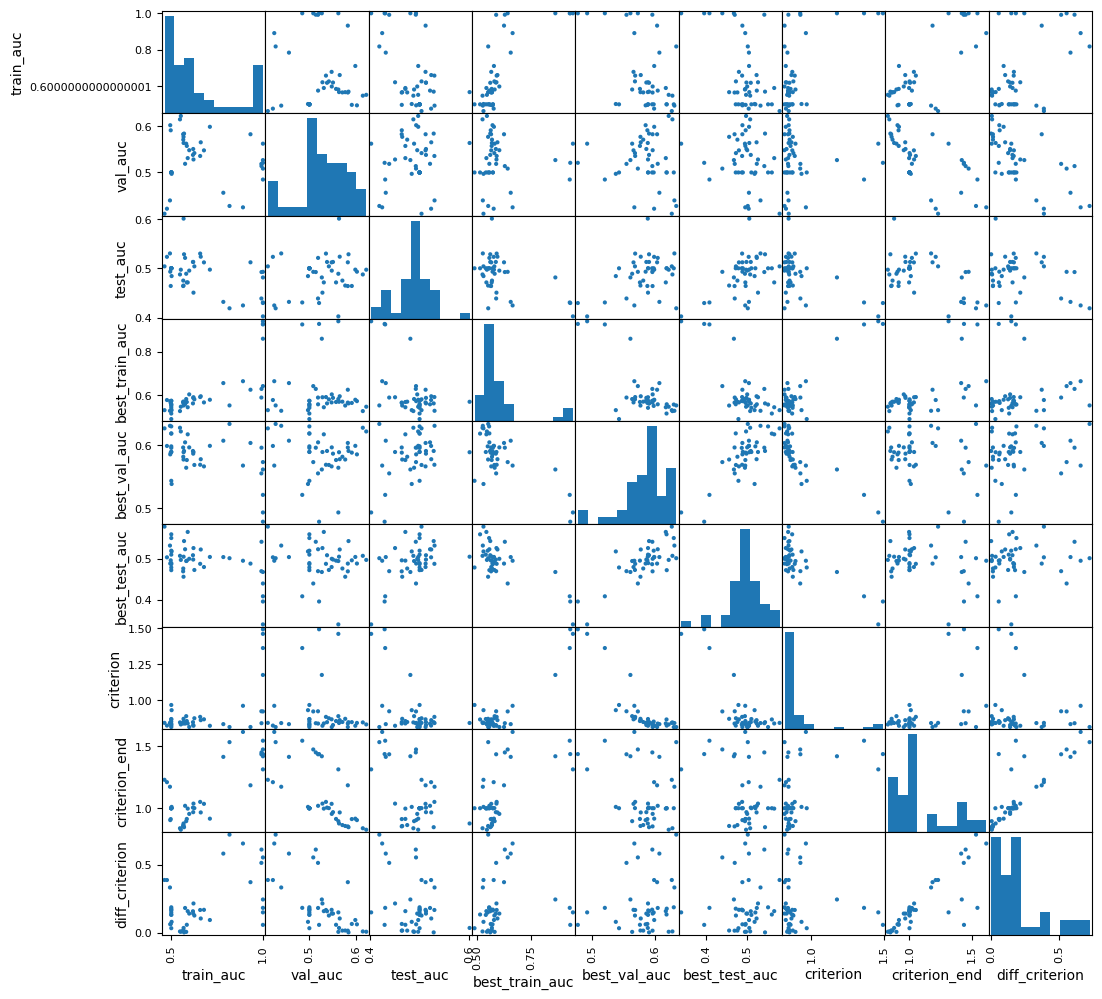

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)
bdd.head()

In [6]:
bdd = bdd.sort_values(by=['criterion'], ascending=True)
print(bdd.head())
bdd.head()['model_path'].tolist()

                                           model_path  train_auc   val_auc  \
8   /volatile2/jc225751/Runs/61_classifier_regress...   0.500000  0.500000   
12  /volatile2/jc225751/Runs/61_classifier_regress...   0.597930  0.547954   
15  /volatile2/jc225751/Runs/61_classifier_regress...   0.817737  0.427823   
37  /volatile2/jc225751/Runs/61_classifier_regress...   0.932117  0.582324   
18  /volatile2/jc225751/Runs/61_classifier_regress...   0.710620  0.598363   

    test_auc  best_train_auc  best_val_auc  best_test_auc  drop_rate  \
8   0.500000        0.556195      0.629624       0.549928   0.185056   
12  0.495238        0.603015      0.596236       0.499423   0.138497   
15  0.418759        0.552018      0.633552       0.500866   0.097845   
37  0.512121        0.624499      0.603273       0.487734   0.156594   
18  0.497258        0.578249      0.598691       0.503896   0.071381   

       gamma        lr  train_loss  criterion  criterion_end  diff_criterion  \
8   0.824909  0.00

['/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/13-04-42_211',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/14-30-27_246',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/15-13-52_154',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/20-18-44_214',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/15-57-33_103']

In [7]:
# bdd[bdd.model_path=='/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/13-07-08_157']

Text(0, 0.5, 'best_test_auc')

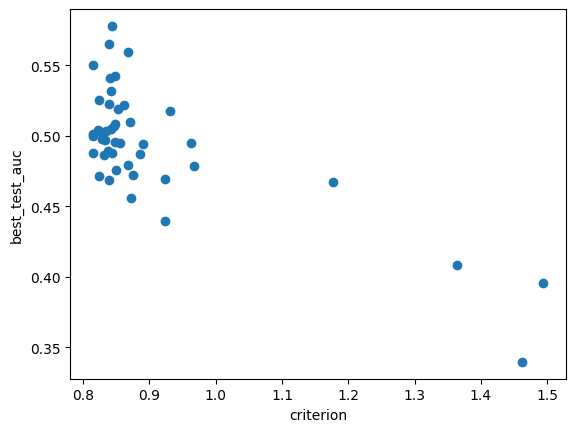

In [8]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

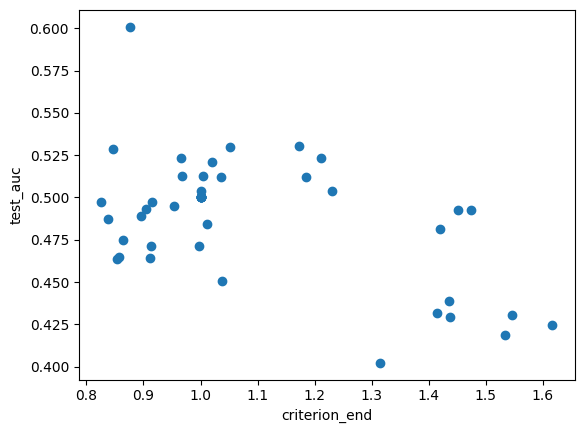

In [9]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [10]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


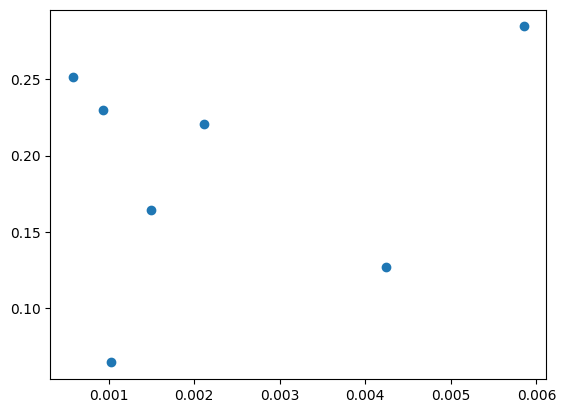

In [11]:
lim = bdd['criterion_end'].quantile(q=0.15)
bdd_lim = bdd[bdd.criterion_end < lim]
plt.plot(bdd_lim.lr, bdd_lim.drop_rate, linestyle='', marker='o')

(0.45, 0.6)

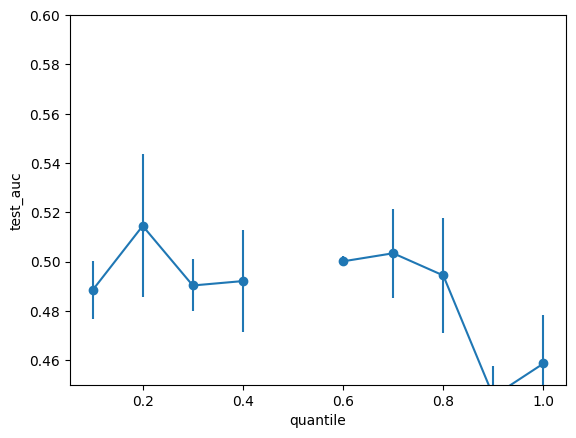

In [12]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.45,0.6))

(0.45, 0.6)

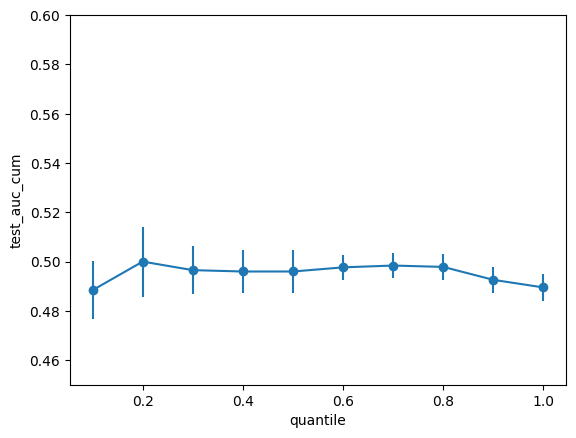

In [13]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

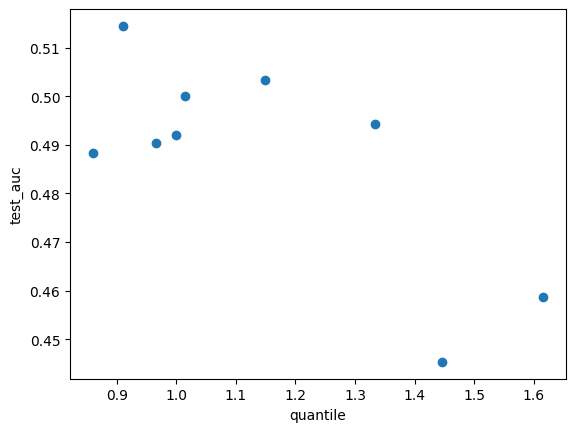

In [14]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [15]:
bdd.sort_values(by=['criterion'], ascending=True).head()['model_path'].tolist()

['/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/13-04-42_211',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/14-30-27_246',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/15-13-52_154',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/20-18-44_214',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-12_BROCA/15-57-33_103']

In [16]:
bdd.sort_values(by=['criterion'], ascending=True).iloc[0]

model_path        /volatile2/jc225751/Runs/61_classifier_regress...
train_auc                                                       0.5
val_auc                                                         0.5
test_auc                                                        0.5
best_train_auc                                             0.556195
best_val_auc                                               0.629624
best_test_auc                                              0.549928
drop_rate                                                  0.185056
gamma                                                      0.824909
lr                                                          0.00605
train_loss                                               138.644501
criterion                                                  0.814182
criterion_end                                                   1.0
diff_criterion                                             0.185818
diff_best                                       

Text(0, 0.5, 'best_test_auc')

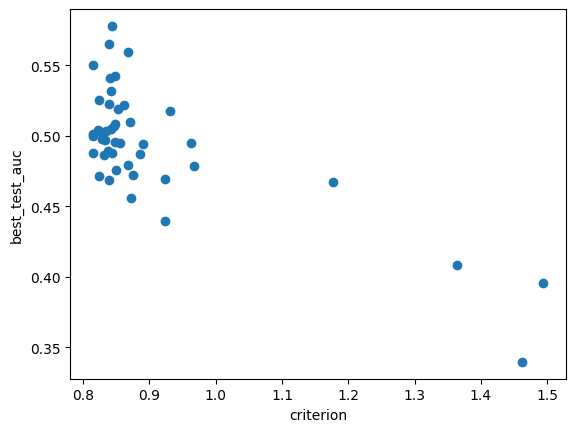

In [17]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [18]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

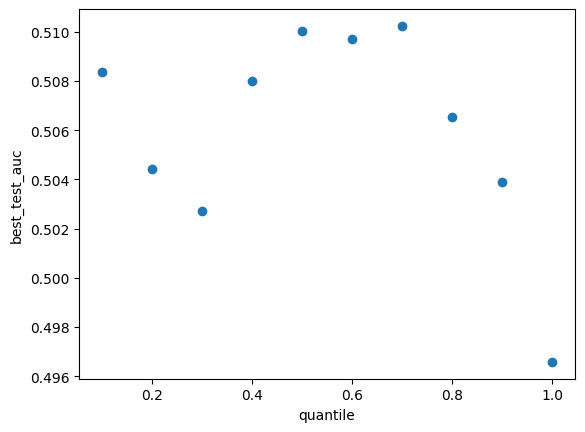

In [19]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

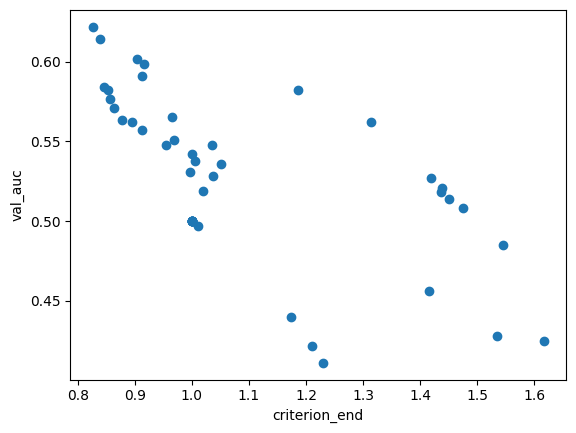

In [20]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

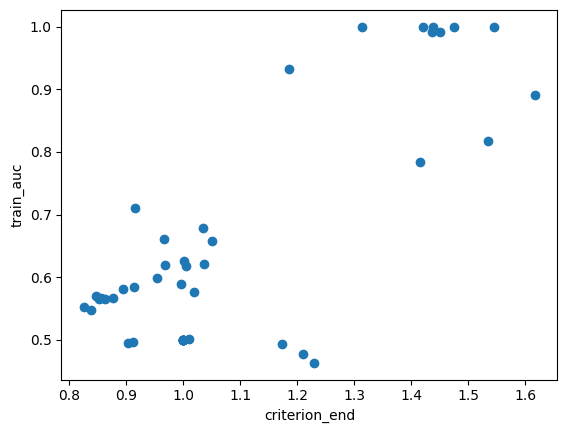

In [21]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [22]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
26,/volatile2/jc225751/Runs/61_classifier_regress...,0.567162,0.563502,0.600866,0.568912,0.588543,0.504473,0.164300,0.907692,0.001501,138.611710,0.842544,0.876655,0.034110,-3.930634,-4.293321,-6.124754,-3.967950
41,/volatile2/jc225751/Runs/61_classifier_regress...,0.492826,0.439771,0.530159,0.527380,0.630606,0.531602,0.092859,0.876087,0.001426,138.651749,0.842014,1.173514,0.331499,-2.270839,-2.763740,-4.938788,-3.788924
6,/volatile2/jc225751/Runs/61_classifier_regress...,0.657648,0.535516,0.529870,0.590719,0.568576,0.487157,0.262777,0.805865,0.000189,138.418350,0.884990,1.051101,0.166111,-3.810258,-2.023953,-5.839585,-3.201071
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.569663,0.583797,0.528427,0.561416,0.590507,0.542569,0.126854,0.952424,0.004243,138.822739,0.848077,0.846540,0.001538,-3.537297,-3.724145,-5.749195,-4.472783
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.660788,0.564975,0.523521,0.594399,0.577414,0.522078,0.160031,0.858233,0.000564,138.008698,0.862157,0.965861,0.103704,-4.075412,-2.246091,-6.174355,-3.114532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.484779,0.430592,0.925747,0.520622,0.408081,0.183328,0.824317,0.000126,95.588501,1.363881,1.545663,0.181782,-0.903559,-0.643936,-2.621819,-0.978839
22,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.520786,0.429437,0.928098,0.477905,0.395382,0.060921,0.708514,0.000141,99.874809,1.494383,1.437643,0.056740,-0.798079,-0.714954,-2.302729,-0.972601
5,/volatile2/jc225751/Runs/61_classifier_regress...,0.891171,0.424877,0.424531,0.663822,0.567267,0.494661,0.209548,0.785565,0.000127,132.437042,0.962022,1.616539,0.654517,-2.337638,-0.741721,-4.357052,-2.173117
15,/volatile2/jc225751/Runs/61_classifier_regress...,0.817737,0.427823,0.418759,0.552018,0.633552,0.500866,0.097845,0.794854,0.000741,134.256042,0.814430,1.534267,0.719837,-2.506745,-0.916507,-5.218074,-6.205456


Text(0, 0.5, 'best_test_auc')

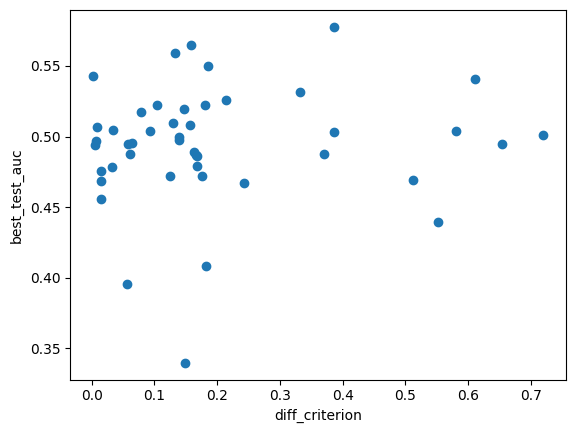

In [23]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

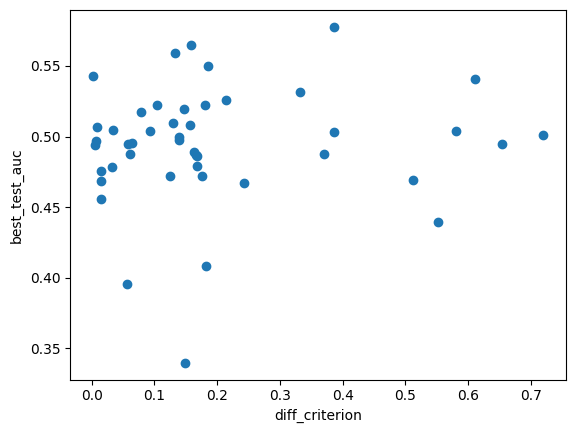

In [24]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

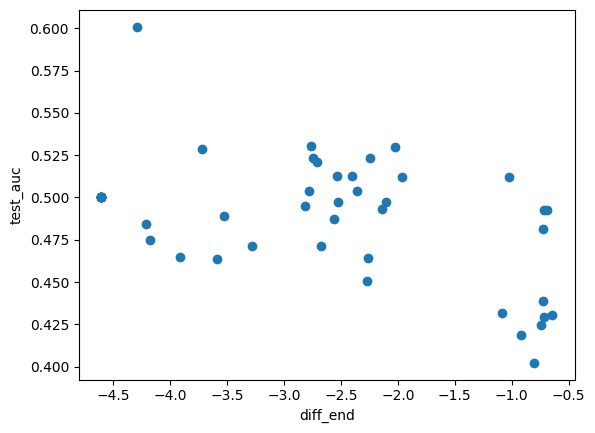

In [25]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

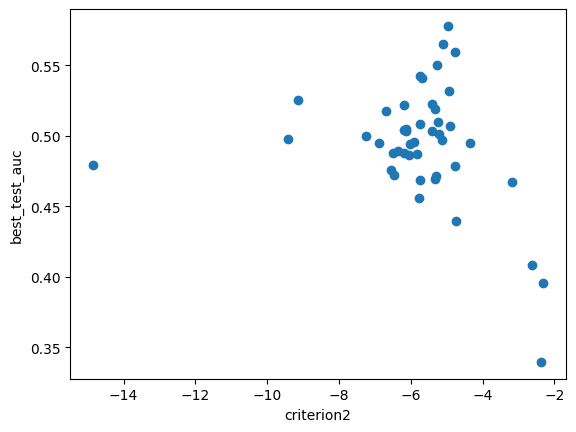

In [26]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

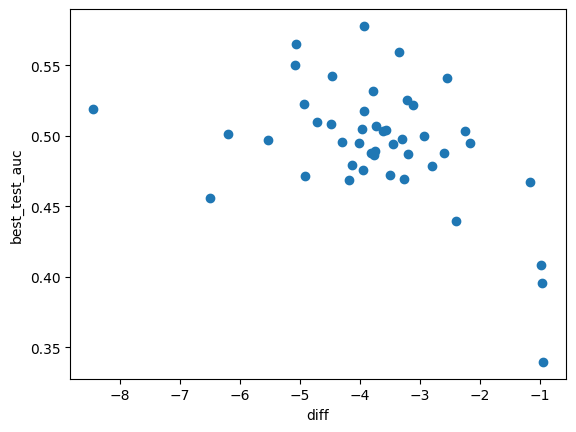

In [27]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

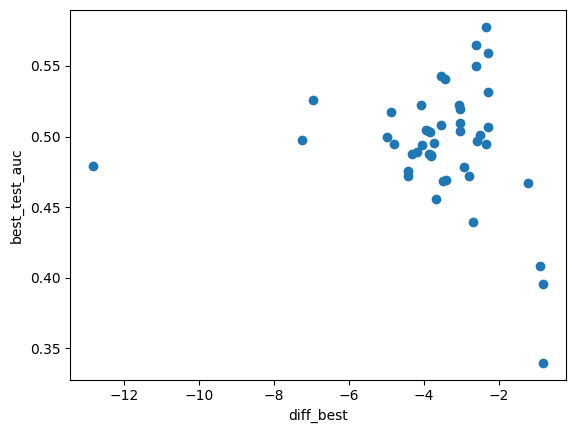

In [28]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

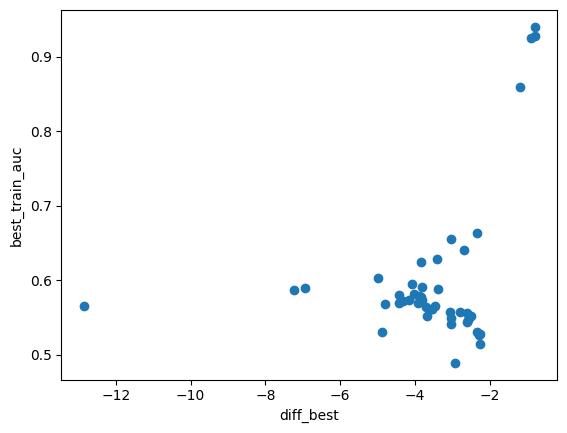

In [29]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

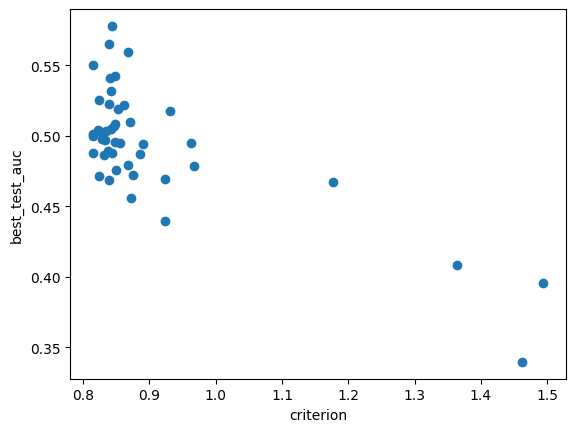

In [30]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

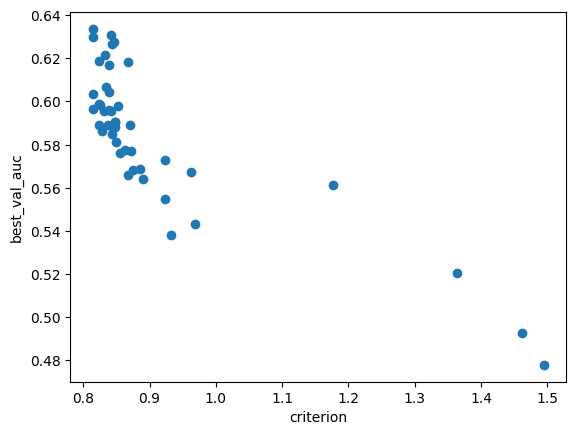

In [31]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'best_train_auc')

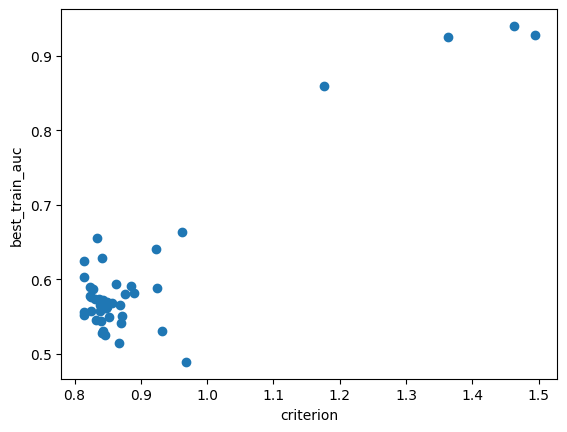

In [32]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

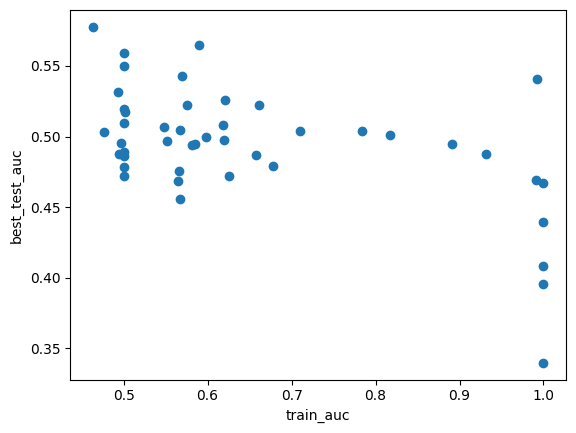

In [33]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

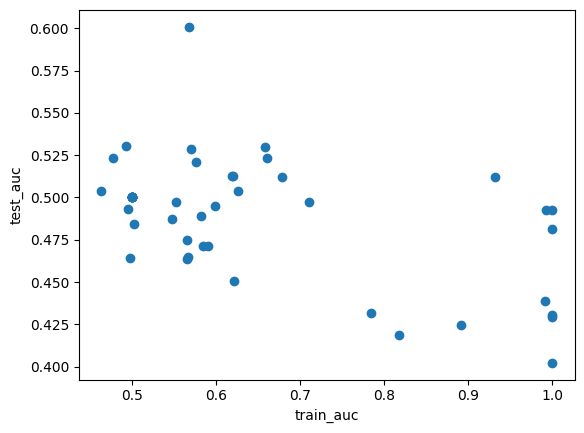

In [34]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

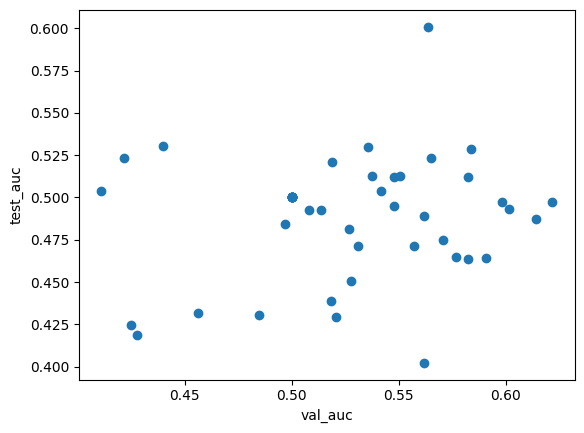

In [35]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

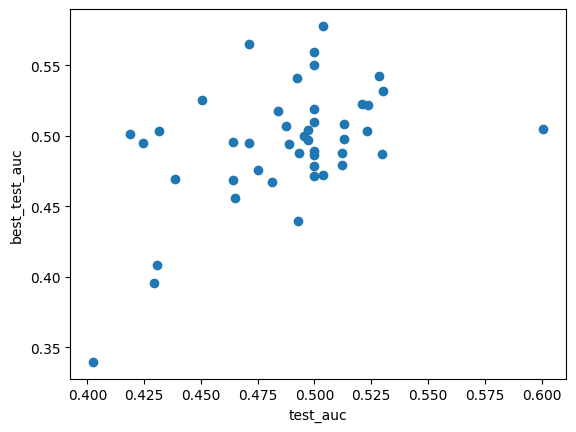

In [36]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

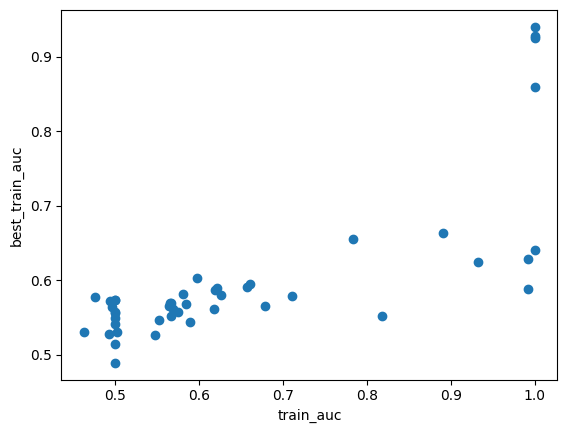

In [37]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

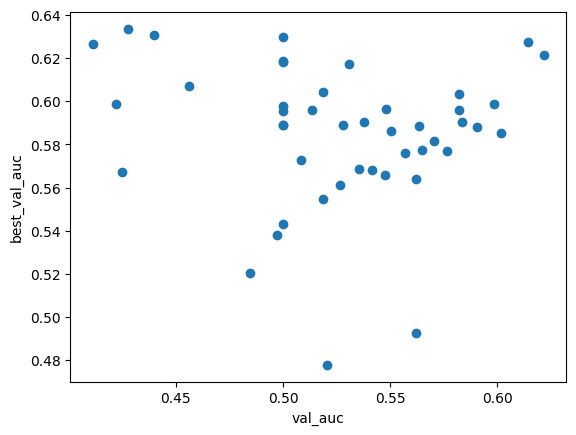

In [38]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

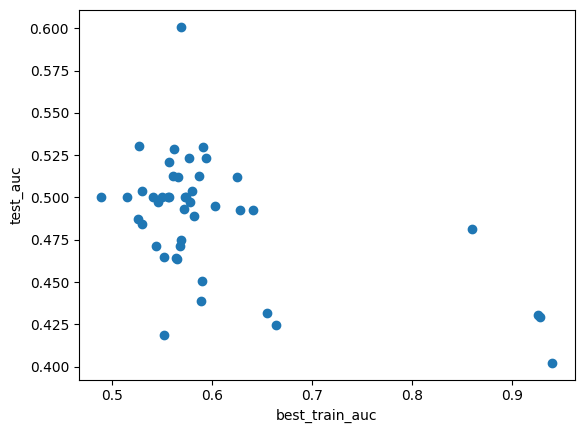

In [39]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

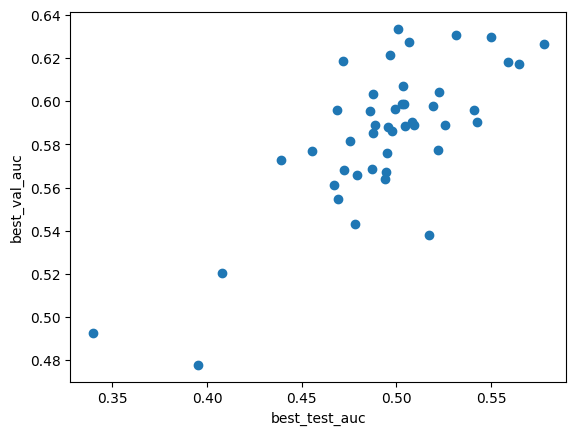

In [40]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

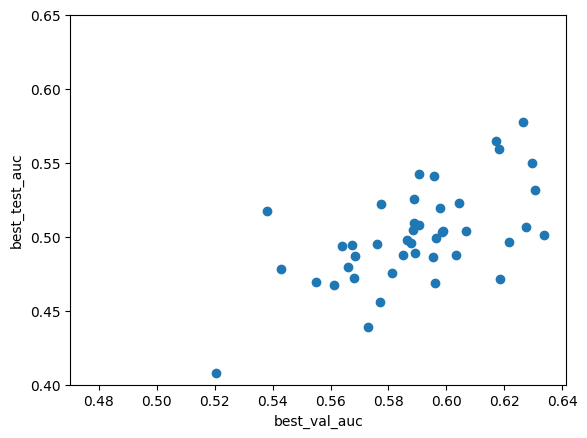

In [41]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

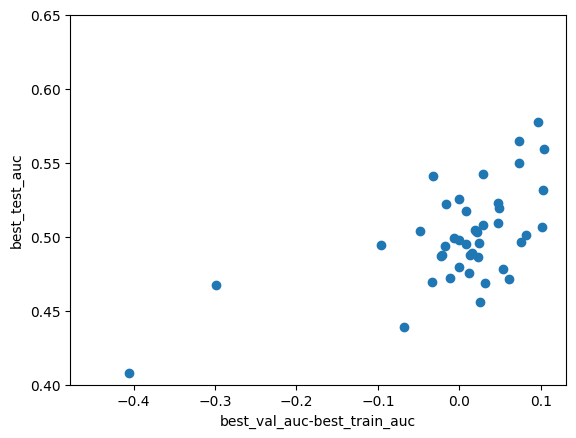

In [42]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

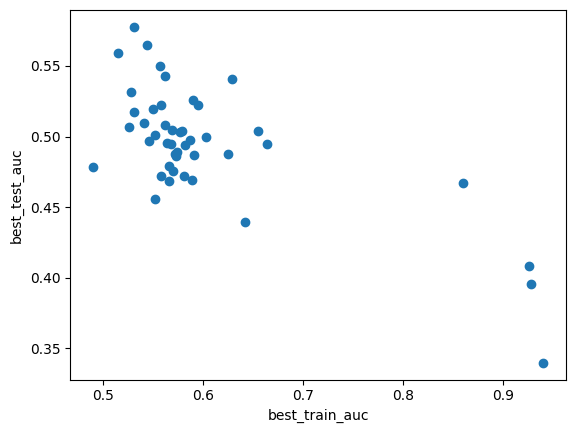

In [43]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

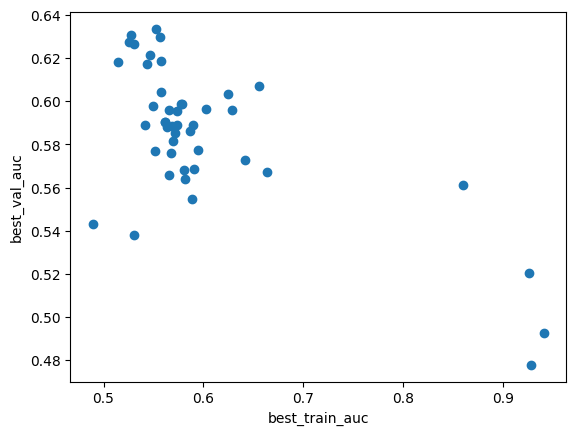

In [44]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

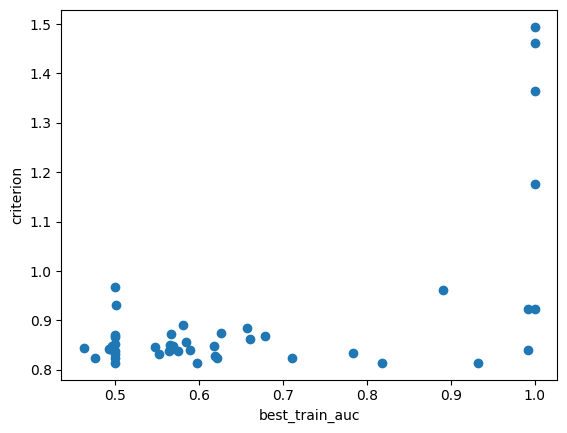

In [45]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

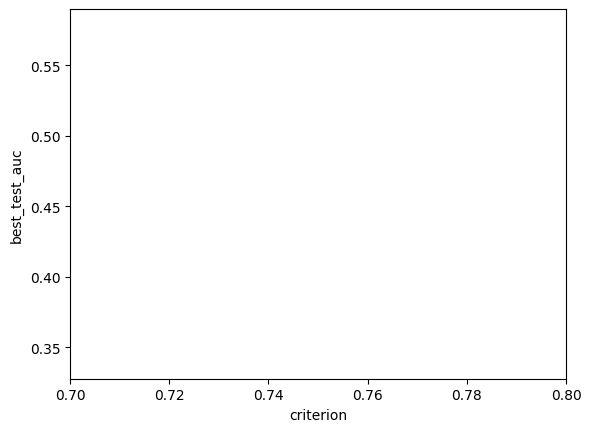

In [46]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

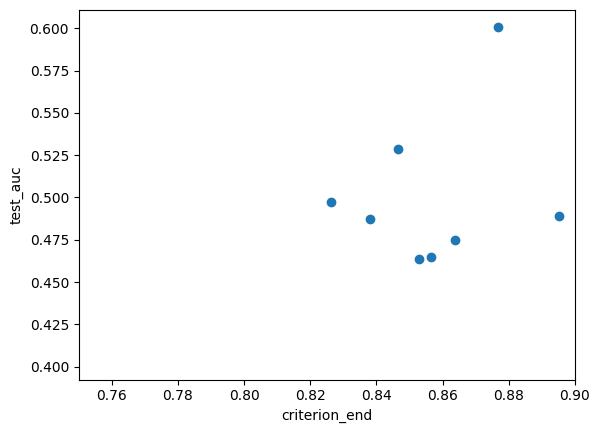

In [47]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

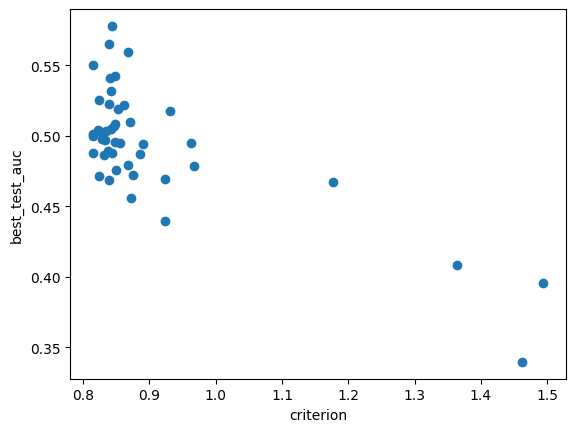

In [48]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

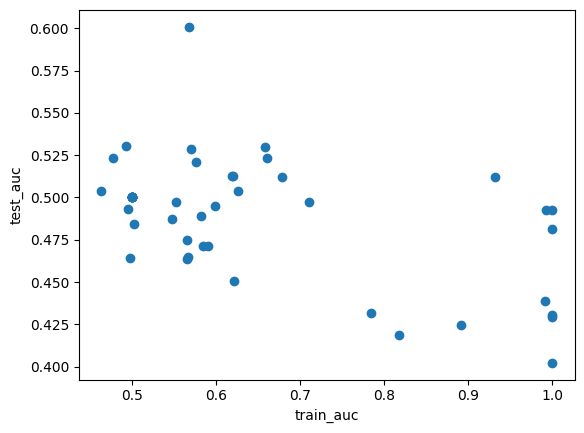

In [49]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

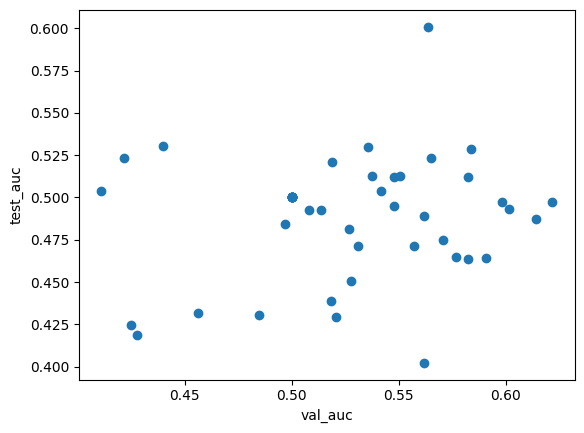

In [50]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

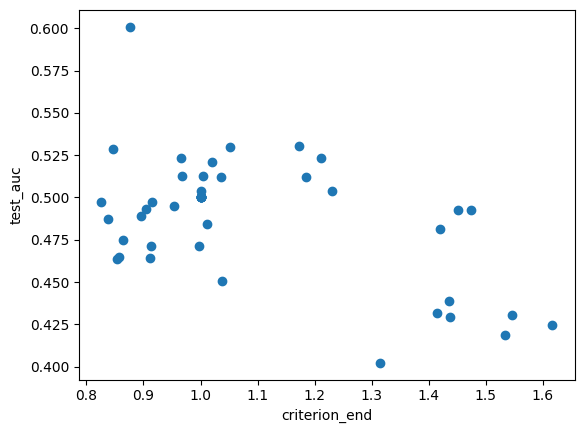

In [51]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

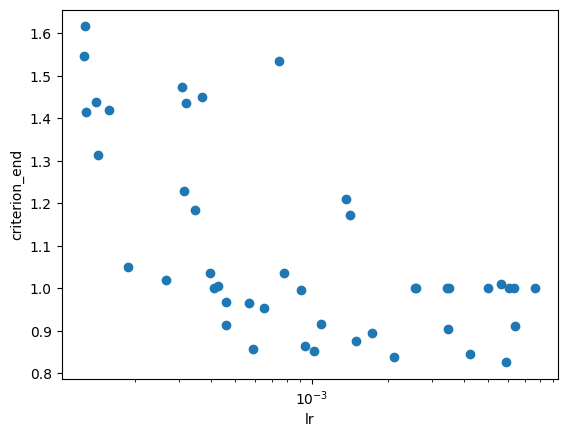

In [52]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

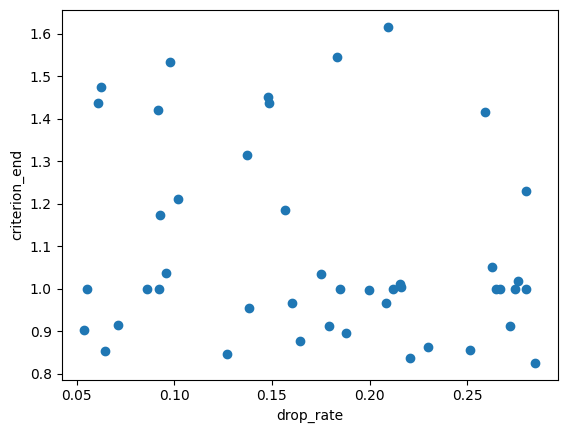

In [53]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_709071/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


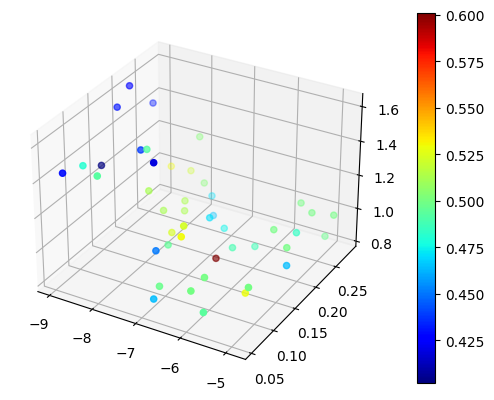

In [54]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_709071/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


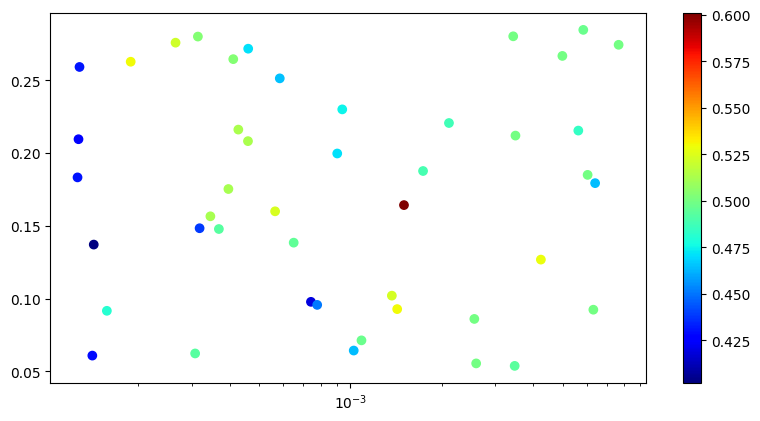

In [55]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_709071/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


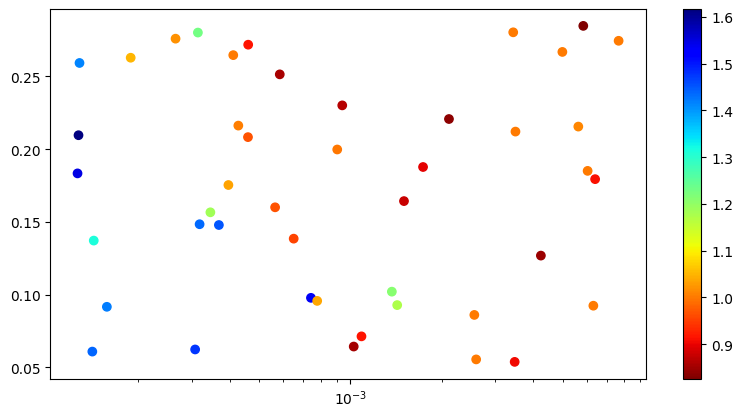

In [56]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

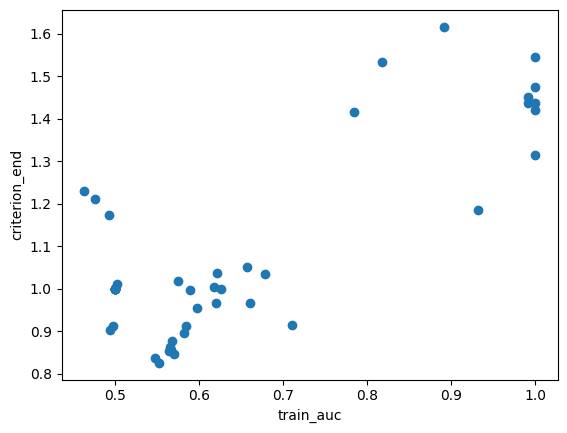

In [57]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

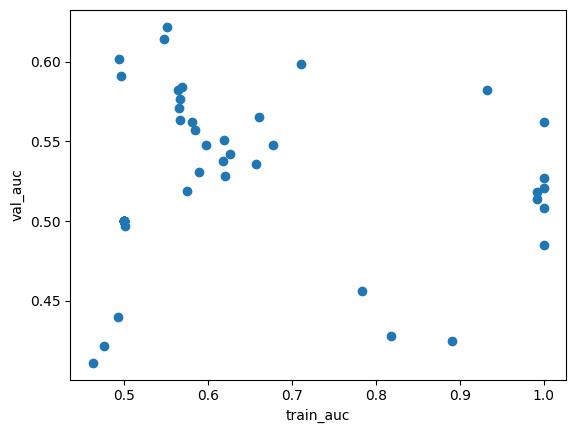

In [58]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

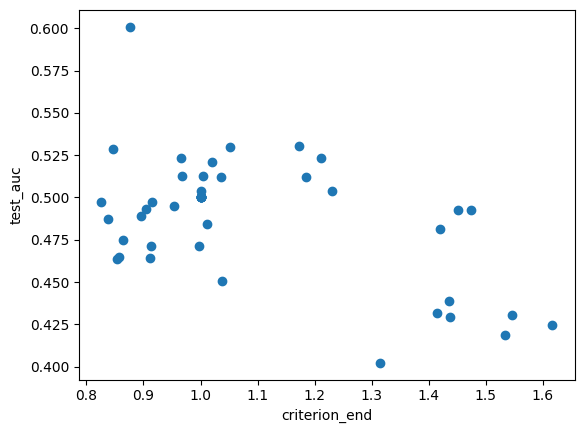

In [59]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

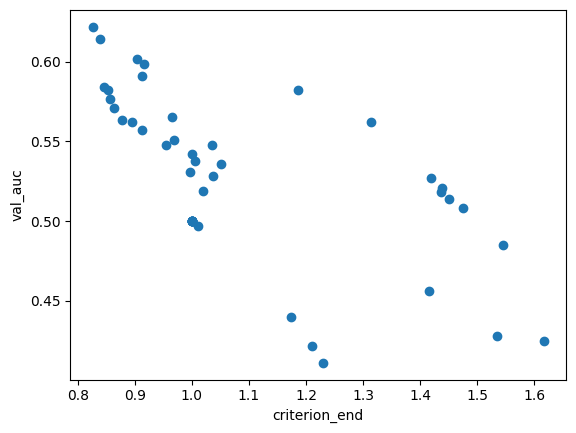

In [60]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

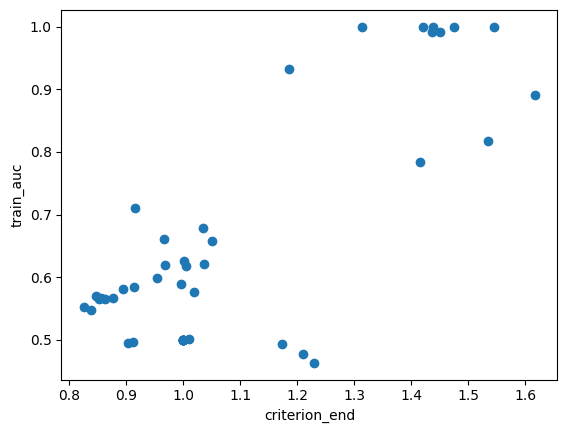

In [61]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [62]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
16,/volatile2/jc225751/Runs/61_classifier_regress...,0.552086,0.621768,0.497114,0.546054,0.621604,0.496681,0.284653,0.798246,0.005854,138.635559,0.832342,0.826146,0.006196,-2.582963,-2.529717,-5.128945,-5.535082
23,/volatile2/jc225751/Runs/61_classifier_regress...,0.547511,0.614403,0.487446,0.525968,0.627496,0.506638,0.220679,0.774391,0.002112,138.629272,0.846536,0.838086,0.008450,-2.287420,-2.565363,-4.911533,-3.728364
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.569663,0.583797,0.528427,0.561416,0.590507,0.542569,0.126854,0.952424,0.004243,138.822739,0.848077,0.846540,0.001538,-3.537297,-3.724145,-5.749195,-4.472783
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.564736,0.582324,0.463925,0.565186,0.596072,0.468831,0.064389,0.980407,0.001025,138.660553,0.838742,0.852940,0.014199,-3.477464,-3.590360,-5.741521,-4.187357
14,/volatile2/jc225751/Runs/61_classifier_regress...,0.566816,0.576759,0.464935,0.551515,0.576923,0.455700,0.251351,0.869186,0.000585,138.656219,0.871562,0.856424,0.015138,-3.672692,-3.914877,-5.767638,-6.492270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.992218,0.513748,0.492352,0.628247,0.595745,0.540837,0.147870,0.864568,0.000368,81.266937,0.841013,1.450974,0.609961,-3.426446,-0.716477,-5.687359,-2.547886
44,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.508347,0.492785,0.641295,0.572831,0.439250,0.062388,0.836812,0.000308,87.439766,0.922800,1.474959,0.552159,-2.681458,-0.689847,-4.743699,-2.393662
15,/volatile2/jc225751/Runs/61_classifier_regress...,0.817737,0.427823,0.418759,0.552018,0.633552,0.500866,0.097845,0.794854,0.000741,134.256042,0.814430,1.534267,0.719837,-2.506745,-0.916507,-5.218074,-6.205456
25,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.484779,0.430592,0.925747,0.520622,0.408081,0.183328,0.824317,0.000126,95.588501,1.363881,1.545663,0.181782,-0.903559,-0.643936,-2.621819,-0.978839


Text(0, 0.5, 'criterion_end')

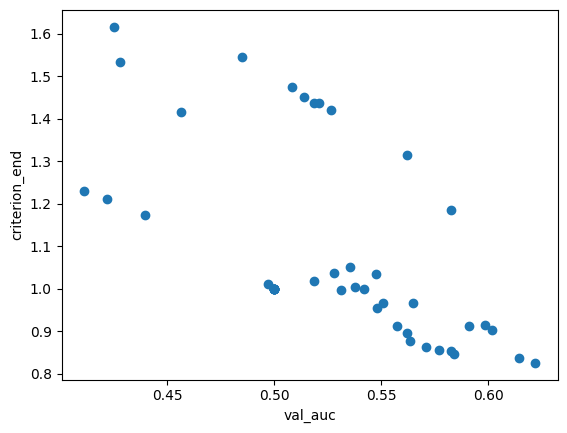

In [63]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

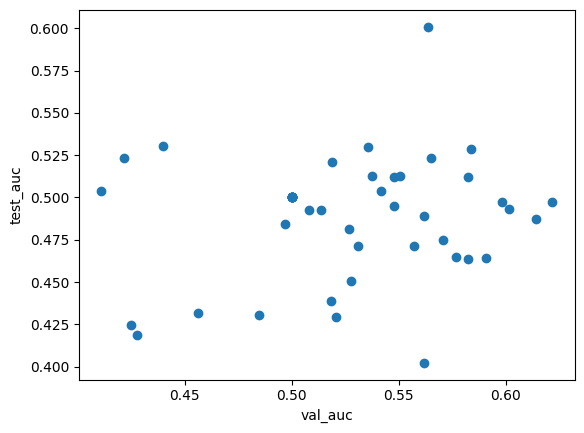

: 

In [64]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")